In [35]:
## Reduce a S1 datacube along temporal axis to a raster

In [1]:
import numpy as np
import os, osr, glob
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import pandas as pd
# import TUW packages
from yeoda.products.preprocessed import SIG0DataCube
from geopathfinder.naming_conventions.yeoda_naming import YeodaFilename

Specify the folder with a S1 datacube (a 300x300 m<sup>2</sup> Equi7Tile)

In [2]:
#tile_dirpath = r'/project/return/Share/EODC_SA020M/V01R01/E051N060T3'
tile_dirpath = r'/project/return/Share/EODC_SA020M/V01R01/E078N066T3'
# specify other parameters:
dimensions=['time', 'band', 'extra_field', 'sensor_field']
filepaths = glob.glob(os.path.join(tile_dirpath,'*.tif'))

Read the datacube:

In [3]:
sig0_dc = SIG0DataCube(filepaths=filepaths, dimensions=dimensions, filename_class=YeodaFilename, sres=20, continent='SA')
# get info:
sig0_dc.inventory[dimensions].head(5)

,time,band,extra_field,sensor_field,var_name,tile_name
0,2019-09-24 09:22:59,VH,D039,S1AIWGRDH,SIG0,E078N066T3
1,2020-11-18 09:14:33,VH,D141,S1B,SIG0,E078N066T3
2,2020-06-21 09:15:13,VV,D141,S1A,SIG0,E078N066T3
3,2019-02-03 09:14:37,VV,D141,S1AIWGRDH,SIG0,E078N066T3
4,2019-02-08 09:23:15,VH,D039,S1AIWGRDH,SIG0,E078N066T3


Filter by date:

In [ ]:
toi_start, toi_end = datetime(2020, 1, 1), datetime(2021, 1, 1)
sig0_dc.filter_by_dimension([(toi_start, toi_end)], [(">", "<")], name="time", inplace=True)

Select bands:

In [5]:
sig0_vv_dc = sig0_dc.filter_by_dimension('VV', name='band')
sig0_vh_dc = sig0_dc.filter_by_dimension('VH', name='band')

Get the datacube geomery

In [6]:
sig0_vv_dc.raster_geometry.shape

(15000, 15000)

Load data 

In [78]:
sig0_vv_dc_chunk1 = sig0_vv_dc.load_by_pixels(1000, 1000, row_size=500, col_size=500, dtype='xarray')
print(sig0_vv_dc_chunk1)

<xarray.Dataset>
Dimensions:  (time: 260, y: 500, x: 500)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-21T09:15:13 ... 2020-06-09T09:15:12
  * y        (y) float64 6.88e+06 6.88e+06 6.88e+06 ... 6.87e+06 6.87e+06
  * x        (x) float64 7.82e+06 7.82e+06 7.82e+06 ... 7.83e+06 7.83e+06
Data variables:
    1        (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan


Rename the variavle

In [79]:
sig0_vv_dc_chunk1 = sig0_vv_dc_chunk1.rename({'1':'sig0_vv'})

Get the mean sig0 raster

In [80]:
sig0_vv_mean = sig0_vv_dc_chunk1.mean(dim='time')
# divide the values by 100 to get dBs:
sig0_vv_mean = sig0_vv_mean/100.
#
print(sig0_vv_mean)

<xarray.Dataset>
Dimensions:  (y: 500, x: 500)
Coordinates:
  * y        (y) float64 6.88e+06 6.88e+06 6.88e+06 ... 6.87e+06 6.87e+06
  * x        (x) float64 7.82e+06 7.82e+06 7.82e+06 ... 7.83e+06 7.83e+06
Data variables:
    sig0_vv  (y, x) float64 -0.7479 -0.7434 -0.6869 ... -0.7967 -0.7465 -0.7445


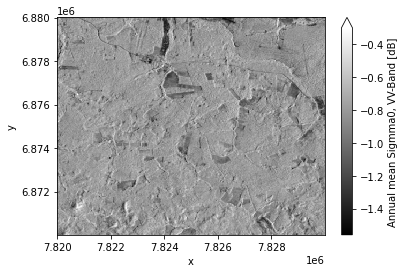

In [91]:
sig0_vv_mean.sig0_vv.plot(vmax=-0.3, cmap='gray', cbar_kwargs={'label': 'Annual mean Sigmma0, VV-Band [dB]'})